# Initial Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

%matplotlib inline
path = 'C:/Users/hansr/Documents/UFM/A4_S7/Machine_Learning_Models/datasets/mlm_project1_datasets/SO_dataset.csv'

In [2]:
so_df = pd.read_csv(path)

# Exploratory Data Analysis

In [3]:
so_df.head()

,title_length,question_length,accepted_answer_id,question_date,tags,tags_length,view_count,answer_date
0,53,2574,37738104,2016-06-09 20:10:52.550 UTC,google-analytics|drupal-7|google-tag-manager|u...,80,522,2016-06-10 00:13:02.770 UTC
1,27,535,37442587,2016-05-25 15:36:19.577 UTC,sql-server|ssis|enterprise|sql-server-data-too...,56,42,2016-05-25 16:12:18.980 UTC
2,87,1946,37550734,2016-05-31 15:36:47.460 UTC,r,1,56,2016-05-31 16:10:38.387 UTC
3,53,418,37768366,2016-06-11 17:38:54.733 UTC,api|oauth|google-analytics|google-analytics-ap...,73,1361,2016-06-11 20:46:14.160 UTC
4,57,1250,37594489,2016-05-24 09:32:21.660 UTC,permissions|file-permissions|tomcat8|permissio...,77,2908,2016-06-02 14:17:18.903 UTC


In [4]:
so_df.isnull().sum()

title_length          0
question_length       0
accepted_answer_id    0
question_date         0
tags                  0
tags_length           0
view_count            0
answer_date           0
dtype: int64

We are able to see we are handling a good dataset, without any NA values present in any of the columns. Still, there could be presence of outliers in our numeric columns.

## Calculate days difference between question and answer

In [5]:
so_df[['answer_date','question_date']] = so_df[['answer_date','question_date']].apply(pd.to_datetime)
so_df['hours_elapsed'] = (so_df['answer_date'] - so_df['question_date']).astype('timedelta64[h]')

In [6]:
so_df.describe()

,title_length,question_length,accepted_answer_id,tags_length,view_count,hours_elapsed
count,16000.00000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000
mean,53.55025,1403.499188,3.190319e+07,24.946375,1418.257312,167.613313
std,20.37151,1714.626442,1.675979e+07,14.100702,6051.375412,1428.473559
min,15.00000,39.000000,6.192000e+03,1.000000,9.000000,0.000000
25%,39.00000,545.000000,1.793041e+07,14.000000,65.000000,0.000000
50%,50.00000,933.000000,3.177832e+07,23.000000,283.000000,0.000000
75%,65.00000,1636.000000,4.497400e+07,34.000000,912.750000,5.000000
max,150.00000,34938.000000,6.516455e+07,91.000000,259890.000000,51670.000000


## Initial observations
We can see that the average response time in stackoverflow, regardless of the platform or programming language, is about 6 days.
The largest time taken to respond was 2,152 days or equivalent to almost 6 years. It's important to notice that the time taken between
responses is due to the qualification of the answer being a valid one. There is possibility that the question already had several responses
but none of which were considered valid.

## Most famous languages / frameworks
We will gather the top 10 most asked/answered frameworks in order to reduce our number of categories.

In [7]:
so_df['tags'] = so_df['tags'].str.replace('|',' ')

<ipython-input-7-9c80f168b0ce>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  so_df['tags'] = so_df['tags'].str.replace('|',' ')


We separate the tags in order to analyze by words

In [8]:
so_df.head()

,title_length,question_length,accepted_answer_id,question_date,tags,tags_length,view_count,answer_date,hours_elapsed
0,53,2574,37738104,2016-06-09 20:10:52.550000+00:00,google-analytics drupal-7 google-tag-manager u...,80,522,2016-06-10 00:13:02.770000+00:00,4.0
1,27,535,37442587,2016-05-25 15:36:19.577000+00:00,sql-server ssis enterprise sql-server-data-too...,56,42,2016-05-25 16:12:18.980000+00:00,0.0
2,87,1946,37550734,2016-05-31 15:36:47.460000+00:00,r,1,56,2016-05-31 16:10:38.387000+00:00,0.0
3,53,418,37768366,2016-06-11 17:38:54.733000+00:00,api oauth google-analytics google-analytics-ap...,73,1361,2016-06-11 20:46:14.160000+00:00,3.0
4,57,1250,37594489,2016-05-24 09:32:21.660000+00:00,permissions file-permissions tomcat8 permissio...,77,2908,2016-06-02 14:17:18.903000+00:00,220.0


In [9]:
top_programs = so_df['tags'].str.split(expand=True).stack().value_counts()

In [10]:
top_programs.index[0:10]

Index(['javascript', 'java', 'python', 'c#', 'android', 'php', 'jquery',
       'html', 'css', 'ios'],
      dtype='object')

## Getting the language label

In [11]:
so_df['language'] = so_df['tags'].str.split().str.get(0)

To simplify our analysis, we decide to filter out any other languages/frameworks not found in the top 10.

In [12]:
strings_to_match = np.array(top_programs.index[0:10])

match_pattern = fr"\b(?:{'|'.join(strings_to_match)})\b"  # "\b(?:app|he)\b"

so_df['language_final'] = so_df['language'].str.contains(match_pattern, case=True)

In [13]:
so_df.head()

,title_length,question_length,accepted_answer_id,question_date,tags,tags_length,view_count,answer_date,hours_elapsed,language,language_final
0,53,2574,37738104,2016-06-09 20:10:52.550000+00:00,google-analytics drupal-7 google-tag-manager u...,80,522,2016-06-10 00:13:02.770000+00:00,4.0,google-analytics,False
1,27,535,37442587,2016-05-25 15:36:19.577000+00:00,sql-server ssis enterprise sql-server-data-too...,56,42,2016-05-25 16:12:18.980000+00:00,0.0,sql-server,False
2,87,1946,37550734,2016-05-31 15:36:47.460000+00:00,r,1,56,2016-05-31 16:10:38.387000+00:00,0.0,r,False
3,53,418,37768366,2016-06-11 17:38:54.733000+00:00,api oauth google-analytics google-analytics-ap...,73,1361,2016-06-11 20:46:14.160000+00:00,3.0,api,False
4,57,1250,37594489,2016-05-24 09:32:21.660000+00:00,permissions file-permissions tomcat8 permissio...,77,2908,2016-06-02 14:17:18.903000+00:00,220.0,permissions,False


In [14]:
so_df = so_df[so_df['language_final'] != False]

In [15]:
so_df.shape

(6923, 11)

Of the original 16,000 rows, we are now left with 6,923.

## Getting length of tags

In [16]:
so_df['n_tags'] = so_df['tags'].str.split().str.len()

In [17]:
so_df.head()

,title_length,question_length,accepted_answer_id,question_date,tags,tags_length,view_count,answer_date,hours_elapsed,language,language_final,n_tags
6,74,1599,37775015,2016-06-12 13:41:09.847000+00:00,javascript jquery asp.net-mvc-3 checkbox neste...,58,608,2016-06-12 13:50:50.823000+00:00,0.0,javascript,True,5
15,75,264,20565673,2013-12-13 11:41:08.227000+00:00,ios objective-c properties uiviewcontroller ui...,55,56,2013-12-13 11:42:08.783000+00:00,0.0,ios,True,5
16,33,3280,20528066,2013-12-09 14:31:25.113000+00:00,php cakephp localization cakephp-2.4 cakephp-r...,52,1128,2013-12-11 19:18:56.607000+00:00,52.0,php,True,5
20,31,1876,20744094,2013-12-19 10:26:57.397000+00:00,java debugging encryption reverse-engineering ...,59,115,2013-12-23 12:57:15.753000+00:00,98.0,java,True,5
24,103,3704,64998625,2020-11-24 23:08:59.670000+00:00,python pandas latitude-longitude nearest-neigh...,55,27,2020-11-25 04:39:24.253000+00:00,5.0,python,True,5


## Prepare dataframe for model, dropping non relevant columns

In [18]:
so_df.drop(['question_date', 'answer_date', 'accepted_answer_id','language_final', 'tags'], axis=1, inplace=True)

### Encoding
- 1 - Respondieron en un día o menos
- 2 - Respondieron entre 1-7 días
- 3 - Respondieron entre 1-4 semanas
- 4 - Se tardaron más de 1 mes en responder

In [19]:
so_df['language'].value_counts()

javascript                 1647
java                       1101
python                     1082
php                         908
android                     747
ios                         450
jquery                      358
html                        332
css                         144
python-3.x                   84
python-2.7                   21
jquery-mobile                 5
android-studio                5
java-me                       4
java-8                        3
rx-java                       3
xamarin.android               2
jquery-ui                     2
composer-php                  2
python-sphinx                 2
jquery-validate               1
android-calendar              1
spark-java                    1
android-animation             1
ios-simulator                 1
android-edittext              1
facebook-javascript-sdk       1
css-float                     1
mongodb-java                  1
scala-java-interop            1
css-position                  1
html-tab

## General filter
We filter out the tags specifying specific libraries or versions, we are only interested in a general aspect what framework the user is working with. It will also facilitate our process of encoding the variables.

In [20]:
clean_df = so_df[so_df['language'].isin(strings_to_match)]

In [21]:
clean_df['language'].value_counts()

javascript    1647
java          1101
python        1082
php            908
android        747
ios            450
jquery         358
html           332
css            144
Name: language, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
language_vector = clean_df['language'].copy()
clean_df['language_encoded'] = encoder.fit_transform(language_vector)

<ipython-input-22-be9aa1a23e94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['language_encoded'] = encoder.fit_transform(language_vector)


In [23]:
print(encoder.classes_)

['android' 'css' 'html' 'ios' 'java' 'javascript' 'jquery' 'php' 'python']


In [24]:
clean_df.head()

,title_length,question_length,tags_length,view_count,hours_elapsed,language,n_tags,language_encoded
6,74,1599,58,608,0.0,javascript,5,5
15,75,264,55,56,0.0,ios,5,3
16,33,3280,52,1128,52.0,php,5,7
20,31,1876,59,115,98.0,java,5,4
24,103,3704,55,27,5.0,python,5,8


## Prepare dataset for model
We remove the language column and hours_elapsed as they will not be part of our analysis.

In [25]:
clean_df.drop('language', axis=1, inplace=True)

C:\Users\hansr\Documents\UFM\A4_S7\Machine_Learning_Models\mlm_env\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [26]:
clean_df.head()

,title_length,question_length,tags_length,view_count,hours_elapsed,n_tags,language_encoded
6,74,1599,58,608,0.0,5,5
15,75,264,55,56,0.0,5,3
16,33,3280,52,1128,52.0,5,7
20,31,1876,59,115,98.0,5,4
24,103,3704,55,27,5.0,5,8


## Normality Test

array([[<AxesSubplot:title={'center':'title_length'}>,
        <AxesSubplot:title={'center':'question_length'}>,
        <AxesSubplot:title={'center':'tags_length'}>],
       [<AxesSubplot:title={'center':'view_count'}>,
        <AxesSubplot:title={'center':'hours_elapsed'}>,
        <AxesSubplot:title={'center':'n_tags'}>],
       [<AxesSubplot:title={'center':'language_encoded'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

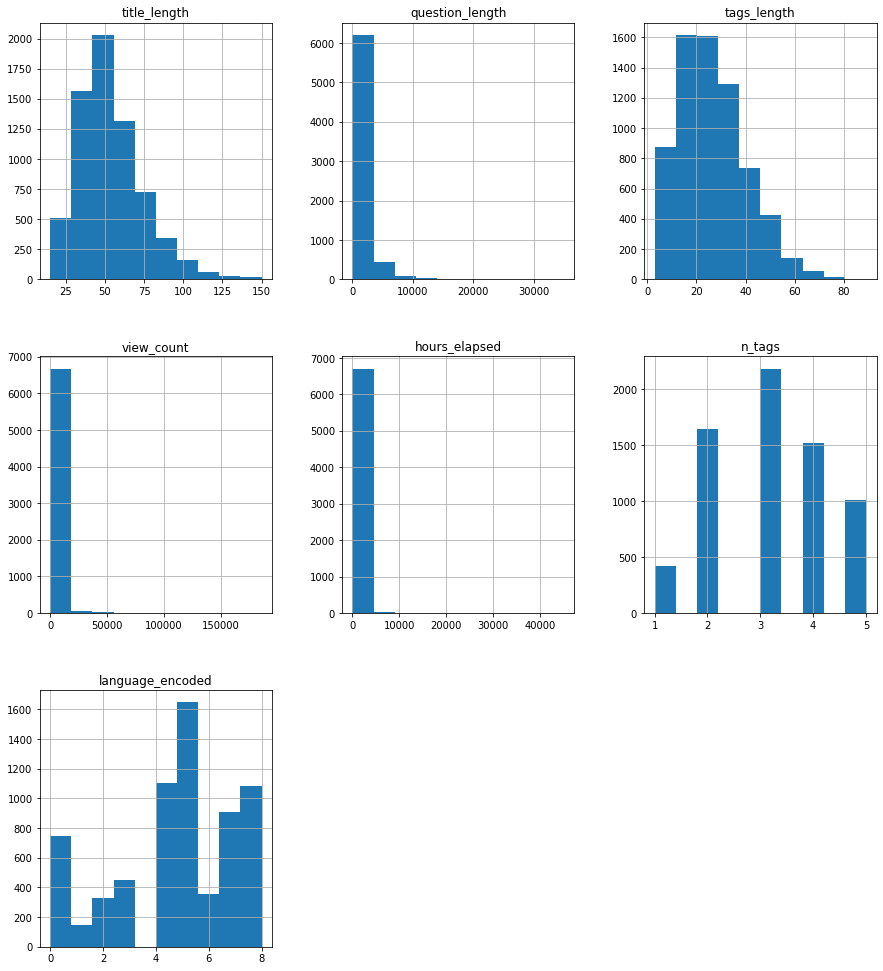

In [27]:
clean_df.hist(figsize=(15,17))

We can see that view_count, question_length and hours_elapsed have the most skew out of all of the columns.

# Correlation Analysis

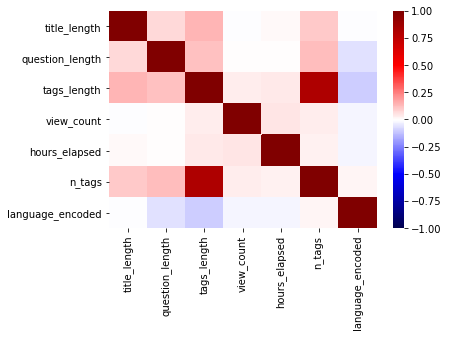

In [28]:
ax = sns.heatmap(clean_df.corr(),vmin=-1,vmax=1,cmap='seismic')

Our features have little to no correlation at all towards the programming language that is being predicted. In the case of question_length and tags_length it has a negative correlation

# Separate features and label

In [29]:
#y = np.log(final_df['binned_hours'].astype('int8')).values
y = clean_df['language_encoded'].copy()
X = clean_df.drop('language_encoded', axis = 1)

In [30]:
X

,title_length,question_length,tags_length,view_count,hours_elapsed,n_tags
6,74,1599,58,608,0.0,5
15,75,264,55,56,0.0,5
16,33,3280,52,1128,52.0,5
20,31,1876,59,115,98.0,5
24,103,3704,55,27,5.0,5
...,...,...,...,...,...,...
15988,65,533,54,1645,0.0,4
15989,68,1280,54,1047,0.0,5
15991,38,1990,54,83,67.0,3
15992,83,969,54,347,0.0,4


In [31]:
X.describe()

,title_length,question_length,tags_length,view_count,hours_elapsed,n_tags
count,6769.000000,6769.000000,6769.000000,6769.000000,6769.000000,6769.000000
mean,53.541143,1582.148323,26.469198,1526.037672,148.742355,3.155267
std,20.520476,1921.864509,13.550535,6317.576516,1370.760613,1.133900
min,15.000000,39.000000,3.000000,10.000000,0.000000,1.000000
25%,39.000000,600.000000,17.000000,63.000000,0.000000,2.000000
50%,50.000000,1030.000000,25.000000,276.000000,0.000000,3.000000
75%,65.000000,1843.000000,35.000000,967.000000,2.000000,4.000000
max,150.000000,34938.000000,89.000000,185567.000000,44984.000000,5.000000


We will need to normalize our data, since our columns vary extensively in number scales and it will help us to have a better classification model afterwards.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Splitting Data

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SGD Classifier
The SGD classifier is used originally in binary classification. When its presented a multiclass problem, by default the algorithm uses the OvA strategy. We can specify the model to use the OvO method, by importing the respective library.

## OvA Strategy
By default the SGD classifier is a OvA (One versus All) strategy

In [34]:
# use a Stochastic Gradient Descent Classifier
# by default, it fits a linear support vector machine (SVM).
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# create instance
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=30)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=30)

In [35]:
ova_clf_score = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring="accuracy")
ova_clf_score

array([0.21940928, 0.23417722, 0.29324895, 0.26371308, 0.2257384 ,
       0.21097046, 0.19620253, 0.20253165, 0.18816068, 0.19238901])

In [36]:
ova_clf_score.mean() #Score for the training data

0.22265412440566995

Our initial OvA classifier isn't performing adequately. It performs better than random guessing but we will continue with OvO to see how it performs

In [38]:
ova_y_pred = sgd_clf.predict(X_test)
ova_final_score = metrics.accuracy_score(y_test, ova_y_pred)

In [39]:
print(metrics.classification_report(y_test,ova_y_pred))

              precision    recall  f1-score   support

           0       0.69      0.05      0.09       216
           1       0.00      0.00      0.00        54
           2       0.13      0.17      0.15       111
           3       0.07      0.23      0.11       137
           4       0.17      0.13      0.15       331
           5       0.29      0.40      0.34       485
           6       0.00      0.00      0.00       105
           7       0.21      0.30      0.25       253
           8       0.19      0.08      0.11       339

    accuracy                           0.20      2031
   macro avg       0.19      0.15      0.13      2031
weighted avg       0.24      0.20      0.18      2031



C:\Users\hansr\Documents\UFM\A4_S7\Machine_Learning_Models\mlm_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hansr\Documents\UFM\A4_S7\Machine_Learning_Models\mlm_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hansr\Documents\UFM\A4_S7\Machine_Learning_Models\mlm_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

## OvO Strategy

In [40]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier())

In [41]:
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier())

In [42]:
ovo_clf_score = cross_val_score(ovo_clf, X_train, y_train, cv=10, scoring="accuracy")
ovo_clf_score

array([0.30168776, 0.27848101, 0.30168776, 0.28481013, 0.2721519 ,
       0.26371308, 0.27637131, 0.28902954, 0.2832981 , 0.31501057])

In [43]:
ovo_clf_score.mean() #Score for the training data

0.2866241157527587

Our OvA classifier works better but we can still expect better results.

In [44]:
ovo_y_pred = ovo_clf.predict(X_test)
ovo_final_score = metrics.accuracy_score(y_test, ovo_y_pred)

In [45]:
print(metrics.classification_report(y_test,ovo_y_pred))

              precision    recall  f1-score   support

           0       0.31      0.29      0.30       216
           1       0.00      0.00      0.00        54
           2       0.00      0.00      0.00       111
           3       0.00      0.00      0.00       137
           4       0.24      0.09      0.13       331
           5       0.31      0.66      0.42       485
           6       0.00      0.00      0.00       105
           7       0.27      0.37      0.31       253
           8       0.23      0.24      0.23       339

    accuracy                           0.29      2031
   macro avg       0.15      0.18      0.15      2031
weighted avg       0.22      0.29      0.23      2031



C:\Users\hansr\Documents\UFM\A4_S7\Machine_Learning_Models\mlm_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hansr\Documents\UFM\A4_S7\Machine_Learning_Models\mlm_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hansr\Documents\UFM\A4_S7\Machine_Learning_Models\mlm_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=10, bootstrap=True)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [47]:
forest_clf_score = cross_val_score(forest_clf, X_train, y_train, cv=10, scoring="accuracy")
forest_clf_score

array([0.35232068, 0.32911392, 0.37341772, 0.32700422, 0.36708861,
       0.35443038, 0.35443038, 0.29746835, 0.32769556, 0.35729387])

In [48]:
forest_clf_score.mean() #Score for the training data

0.3440263690778851

This is a significant improvement over the previous models, however we still need to check if the KNN classifier does better.

In [49]:
forest_y_pred = forest_clf.predict(X_test)
forest_final_score = metrics.accuracy_score(y_test, forest_y_pred)

In [50]:
print(metrics.classification_report(y_test,forest_y_pred))

              precision    recall  f1-score   support

           0       0.43      0.37      0.40       216
           1       0.29      0.04      0.07        54
           2       0.57      0.23      0.32       111
           3       0.11      0.04      0.06       137
           4       0.30      0.33      0.31       331
           5       0.37      0.59      0.45       485
           6       0.44      0.13      0.20       105
           7       0.32      0.38      0.35       253
           8       0.33      0.27      0.30       339

    accuracy                           0.35      2031
   macro avg       0.35      0.26      0.27      2031
weighted avg       0.35      0.35      0.33      2031



# KNN Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
knn_clf_score = cross_val_score(knn_clf, X_train, y_train, cv=10, scoring="accuracy")
knn_clf_score

array([0.2742616 , 0.26582278, 0.26793249, 0.25949367, 0.24894515,
       0.26793249, 0.25738397, 0.26371308, 0.26427061, 0.24524313])

In [56]:
knn_clf_score.mean()

0.26149989741393925

The accuracy score remains similar to both the OvA and OvO classifiers.

In [53]:
knn_y_pred = knn_clf.predict(X_test)
knn_final_score = metrics.accuracy_score(y_test, knn_y_pred)

In [54]:
print(metrics.classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.26      0.38      0.31       216
           1       0.06      0.04      0.04        54
           2       0.19      0.17      0.18       111
           3       0.08      0.06      0.07       137
           4       0.23      0.24      0.23       331
           5       0.37      0.46      0.41       485
           6       0.12      0.06      0.08       105
           7       0.25      0.23      0.24       253
           8       0.24      0.18      0.21       339

    accuracy                           0.27      2031
   macro avg       0.20      0.20      0.20      2031
weighted avg       0.25      0.27      0.25      2031



In [55]:
models_scores = {'OvO': ovo_final_score, 'OvA': ova_final_score, 'RandomForest': forest_final_score, 'KNN': knn_final_score}
print(models_scores)

{'OvO': 0.2865583456425406, 'OvA': 0.19793205317577547, 'RandomForest': 0.34908911866075826, 'KNN': 0.2653865091088134}


# Main conclusion

The Random Forest classifier has the highest accuracy score out of the 4 models.